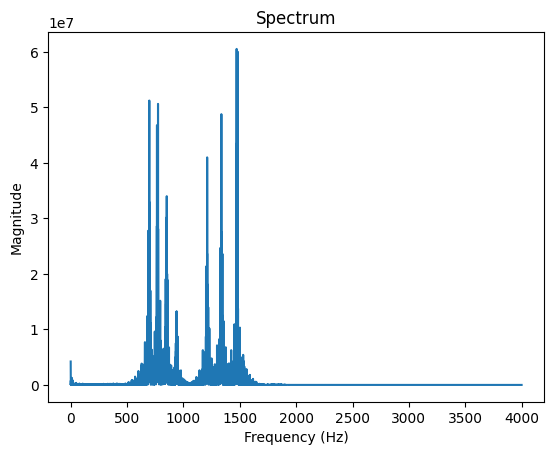

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter

# Función para crear un filtro pasabajas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Función para aplicar el filtro pasabajas a los datos
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Cargar archivo de audio
samplerate, data = wavfile.read('DTMF_dialing.wav')

# Convertir a mono si es estéreo
if len(data.shape) > 1:
    data = np.mean(data, axis=1)

# Aplicar filtro pasabajas
cutoff = 1800  # Frecuencia de corte en Hz
filtered_data = butter_lowpass_filter(data, cutoff, samplerate)

# Obtener la transformada de Fourier
fft_out = np.fft.rfft(filtered_data)

# Obtener las frecuencias absolutas
abs_fft = np.abs(fft_out)

# Escalar las frecuencias para obtenerlas en Hz
freqs_hz = np.fft.rfftfreq(len(filtered_data), 1/samplerate)

# Graficar el espectro
plt.plot(freqs_hz, abs_fft)
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()
